### Import Library

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras

### Initialize Datasets

In [2]:
#  Creating function to import datasets
def addBatikDataset(path):
    # This step will append image and labels
    for label in os.listdir(path):
        label_dir = os.path.join(path, label)
        
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
    
            try:
                image = cv2.imread(image_path)
                image = cv2.resize(image, (100, 100))
            except:
                continue
            images.append(image)
            labels.append(1)

In [3]:
# Creating function to import datasets not batik (this function different with batik image dataset, because the structure folder is different each other)
def addNoBatikDataset(path): 
    # This step will append image and labels
    for image_file in os.listdir(path):
        image_path = os.path.join(path, image_file)
    
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, (100, 100))
        except:
            continue
        images.append(image)
        labels.append(0)

In [4]:
# Initialize empty array
images = []
labels = []

# Initialize image dataset path
datasets_batik_path = 'D:\\Batik Dataset\\Batik'
datasets_notbatik_path = 'D:\\Batik Dataset\\Bukan Batik'

# Add Image Dataset to Array
addBatikDataset(datasets_batik_path);
addNoBatikDataset(datasets_notbatik_path)

### Converts Images and Label
This steps will converts images and labels array to Numpy array

For additional this steps also normalize numpy images array

In [5]:
images = np.array(images)
labels = np.array(labels)

In [6]:
print(images.shape)
print(labels.shape)

(1027, 100, 100, 3)
(1027,)


In [7]:
images_reshaped = images.reshape(-1, 100, 100, 3)
images_reshaped_normalize = images_reshaped / 255
images_reshaped_normalize.shape

(1027, 100, 100, 3)

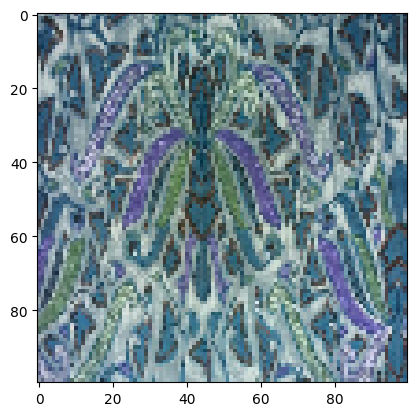

In [8]:
plt.imshow(images_reshaped[1])
plt.imshow(images[9])

In [32]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(20, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(images, labels, epochs=20)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8039 - loss: 42.8124
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9677 - loss: 0.2734
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9799 - loss: 0.0573
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9888 - loss: 0.0405
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9865 - loss: 0.0437
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 1.0000 - loss: 0.0069
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9993 - loss: 0.0069
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9993 - loss: 0.0056
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 1.0000 - loss: 0.0054
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 1.0000 - loss: 0.0030
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy

In [33]:
model.evaluate(images, labels)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 1.0000 - loss: 2.3223e-04


[0.0005514505319297314, 1.0]

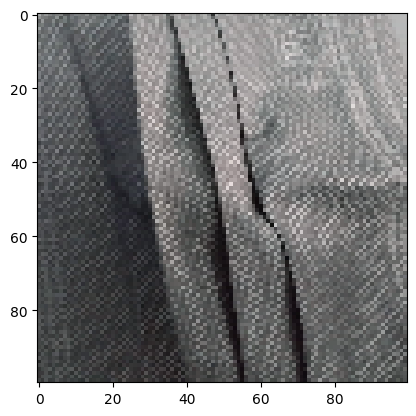

In [34]:
# image_for_test = cv2.imread('D:\\Batik Dataset\\Data Test\\images (13).jpg')
image_for_test = cv2.imread('D:\\Batik Dataset\\Data Test\\no_batik_3.jpg')
image_for_test = cv2.resize(image_for_test, (100, 100))

image_test_dataset = np.array([image_for_test])
image_test_dataset_reshaped = image_test_dataset.reshape(-1, 100, 100, 3)
image_test_dataset_reshaped_normalized = image_test_dataset_reshaped / 255

image_test = np.array(image_test_dataset_reshaped_normalized)
plt.imshow(image_test[0])

In [35]:
prediction = model.predict(image_test)
prediction = [np.argmax(i) for i in prediction]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


In [30]:
prediction

[0]

In [37]:
clasess  = ["Bukan Batik","Batik"]
clasess[prediction[0]]

'Bukan Batik'